Importing the Dependencies

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report



Data Collection and Data Processing

In [9]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('/content/Copy of sonar data.csv', header=None)

In [10]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [11]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [12]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


M --> Mine

R --> Rock

In [14]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [15]:
# separating data and Labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [16]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Training and Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=1)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [19]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
183  0.0096  0.0404  0.0682  0.0688  0.0887  0.0932  0.0955  0.2140  0.2546   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
149  0.0207  0.0535  0.0334  0.0818  0.0740  0.0324  0.0918  0.1070  0.1553   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
94   0.0025  0.0309  0.0171  0.0228  0.0434  0.1224  0.1947  0.1661  0.1368   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

Model Training --> Logistic Regression

In [20]:
model = LogisticRegression()

In [21]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [22]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8433734939759037


In [24]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.6904761904761905


Making a Predictive System

In [26]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine


*Creating a Decision Tree*

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
treemodel=DecisionTreeClassifier()

In [29]:
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.4147727272727273, 0.9285714285714286, 'x[10] <= 0.171\ngini = 0.497\nsamples = 166\nvalue = [89, 77]'),
 Text(0.13636363636363635, 0.7857142857142857, 'x[44] <= 0.163\ngini = 0.299\nsamples = 60\nvalue = [11, 49]'),
 Text(0.2755681818181818, 0.8571428571428572, 'True  '),
 Text(0.09090909090909091, 0.6428571428571429, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[15] <= 0.33\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.13636363636363635, 0.5, 'x[6] <= 0.063\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.09090909090909091, 0.35714285714285715, 'x[55] <= 0.003\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13636363636363635, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.22727272727272727, 0.5, 'gi

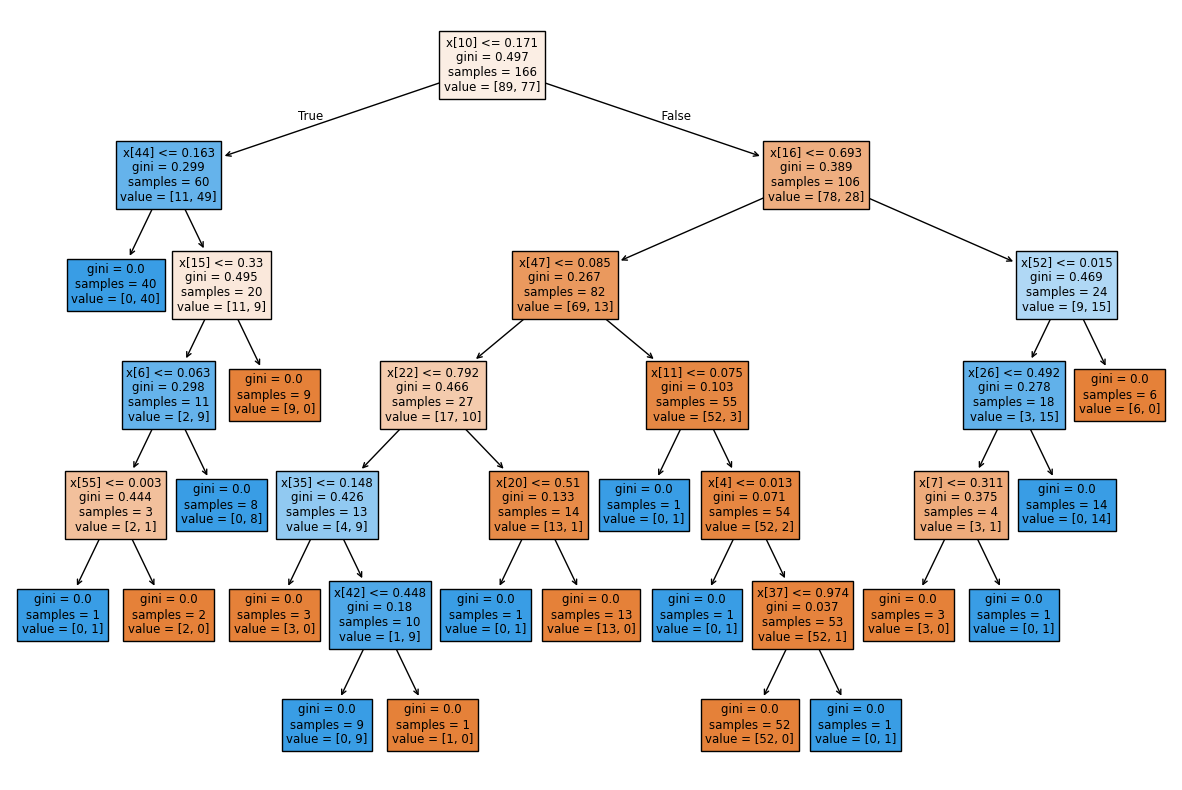

In [30]:
from sklearn import tree
plt.figure (figsize=(15,10))
tree.plot_tree(treemodel, filled=True)

In [31]:
##making predictions from decision tree :
Y_pred=treemodel.predict(X_test)


In [32]:
Y_pred

array(['R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M',
       'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R',
       'R', 'R', 'R'], dtype=object)

In [33]:
## prediction on test vectors passed above :

input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = treemodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine


In [34]:
#accuracy on training data
training_pred = model.predict(X_train)
tda = accuracy_score(training_pred, Y_train)
print('Accuracy on training data : ', tda)
## accuracy on test data :
test_pred = treemodel.predict(X_test)
ttda = accuracy_score(test_pred, Y_test)
print('Accuracy on test data : ', ttda)

Accuracy on training data :  0.8433734939759037
Accuracy on test data :  0.7619047619047619


Comparing the Classification report of both algorithms on training data :

**Evaluation metrics for Logistic regression**

In [35]:
print("Classification Report for Logistic Regression on Test Data:")
print(classification_report(Y_test, X_test_prediction))

Classification Report for Logistic Regression on Test Data:
              precision    recall  f1-score   support

           M       0.74      0.64      0.68        22
           R       0.65      0.75      0.70        20

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.70      0.69      0.69        42



In [42]:
cc = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix for logistic regression on Test Data:")
print(cc)

Confusion Matrix for logistic regression on Test Data:
[[14  8]
 [ 5 15]]


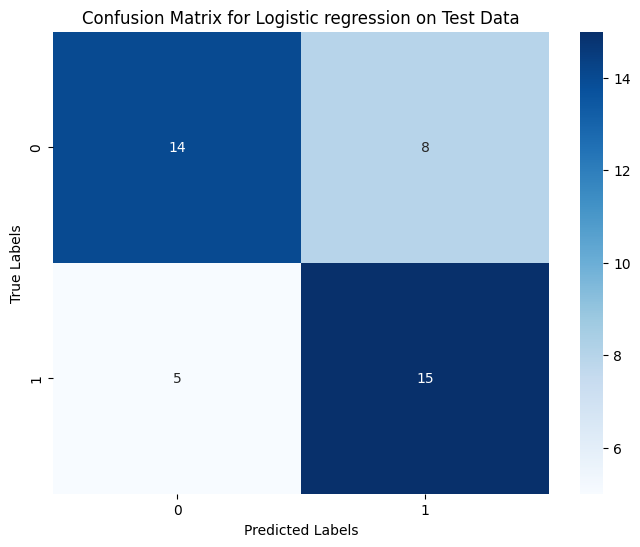

In [47]:
##code for heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic regression on Test Data')
plt.show()

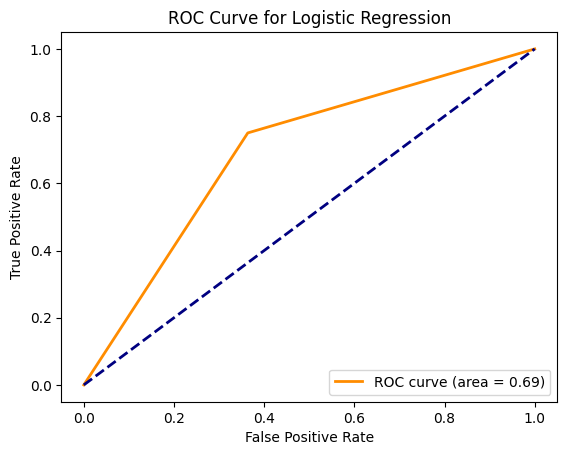

In [59]:
## ROC curve

label_encoder = LabelEncoder()
Y_test_binary = label_encoder.fit_transform(Y_test)  # 'M' and 'R' will be converted to 0 and 1
X_test_prediction_binary = label_encoder.transform(X_test_prediction)


fpr, tpr, _ = roc_curve(Y_test_binary, X_test_prediction_binary)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()



In [58]:
accuracy = accuracy_score(Y_test, X_test_prediction)
precision = precision_score(Y_test, X_test_prediction, pos_label='M')
recall = recall_score(Y_test, X_test_prediction, pos_label='M')
f1 = f1_score(Y_test, X_test_prediction, pos_label='M')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6904761904761905
Precision: 0.7368421052631579
Recall: 0.6363636363636364
F1 Score: 0.6829268292682927


**Evaluation metrics for decision Tree classifier**

In [36]:
print("Classification Report for Decision Tree on Test Data:")
print(classification_report(Y_test, test_pred))


Classification Report for Decision Tree on Test Data:
              precision    recall  f1-score   support

           M       0.88      0.64      0.74        22
           R       0.69      0.90      0.78        20

    accuracy                           0.76        42
   macro avg       0.78      0.77      0.76        42
weighted avg       0.79      0.76      0.76        42



In [60]:
# all major evaluation metrics
accuracy = accuracy_score(Y_test, test_pred)
precision = precision_score(Y_test, test_pred, pos_label='M')
recall = recall_score(Y_test, test_pred, pos_label='M')
f1 = f1_score(Y_test, test_pred, pos_label='M')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7619047619047619
Precision: 0.875
Recall: 0.6363636363636364
F1 Score: 0.7368421052631579


In [61]:
cm = confusion_matrix(Y_test, test_pred)
print("Confusion Matrix for Decision Tree on Test Data:")
print(cm)


Confusion Matrix for Decision Tree on Test Data:
[[14  8]
 [ 2 18]]


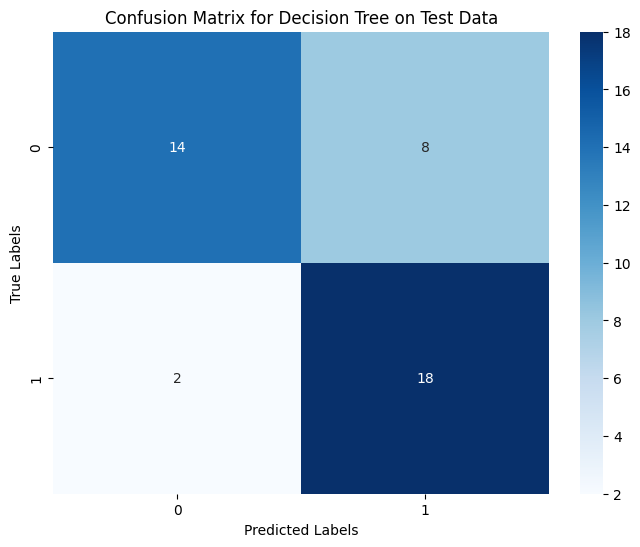

In [62]:
## code for heatmap of decision tree classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree on Test Data')
plt.show()

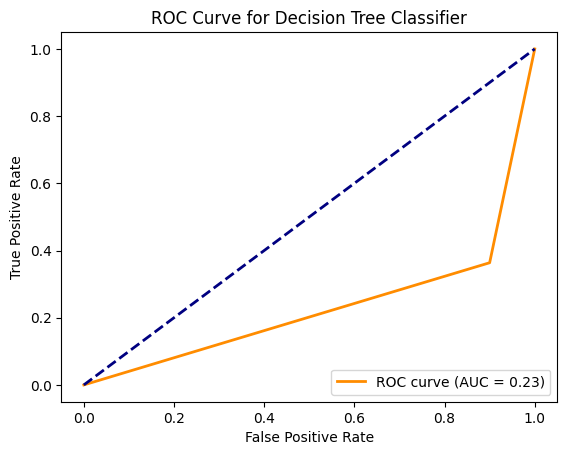

In [64]:
y_score = treemodel.predict_proba(X_test)[:, 1]  # Select probability for positive class

# Step 2: Calculate the ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_score, pos_label='M')
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend(loc="lower right")
plt.show()